In [1]:
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import load_model
%matplotlib inline

Using TensorFlow backend.


In [6]:
model = load_model('lenet.h5')

In [7]:
def returndigit(path):
    img =cv2.imread(path,0)
    invereted_img = 255-img
#     invereted_img =img
    invereted_img = invereted_img.astype('float32')
    invereted_img /= 255
    imgheight, imgwidth = invereted_img.shape
    old_i = 0
    finalnumber = []
    for i in range(0,imgwidth-1):
        count = 0
        for j in range(0,imgheight):
            if invereted_img[j][i] == 0:
                count +=1
                
            if count == imgheight:
                croppedimg = invereted_img[:,old_i:i+1]
                croppedwidth = croppedimg.shape[1]
                old_i = i
                if croppedwidth <= 28 and croppedwidth >= 5:
                    remaining = 28-croppedwidth
                    remaining1 = int(remaining/2)
                    remaining2 = remaining - remaining1
                    croppedimg = np.concatenate((np.zeros((28, remaining1),np.uint8),croppedimg, np.zeros((28, remaining2),np.uint8)),axis=1)
                    croppedimg = croppedimg.reshape(1,croppedimg.shape[0],croppedimg.shape[1],1)
                    pred = model.predict(croppedimg).tolist()[0]
                    finalnumber.append(pred.index(max(pred)))
    return int(''.join(str(e) for e in finalnumber))




23032017


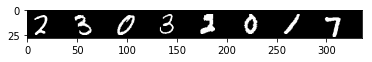

In [60]:
# path = '/media/windows-share/dates_new/'+ listwrongdate[1]
path = "/media/windows-share/dates_new/date_4.png"
Number =returndigit(path)
print(Number)
plt.imshow(255-cv2.imread(path))

In [18]:
import pandas as pd
details = pd.read_csv('/media/windows-share/details3.csv')
details.head()

,Unnamed: 0,Unnamed: 0.1,0,1,2,3,4,5,6
0,0,0,b_car_003001.png,32936,Thirty Two Thousand Nine Hundred Thirty Six only,0,number_0.png,16062017,date_0.png
1,1,1,b_car_003002.png,135662,One Lakh Thirty Five Thousand Six Hundred Sixt...,1,number_1.png,2052017,date_1.png
2,2,2,b_car_003003.png,180000,One Lakh Eighty Thousand only,2,number_2.png,6022016,date_2.png
3,3,3,b_car_003004.png,764575,Seven Lakh Sixty Four Thousand Five Hundred Se...,3,number_3.png,25072016,date_3.png
4,4,4,b_car_003005.png,813000,Eight Lakh Thirteen Thousand only,4,number_4.png,23032017,date_4.png


In [24]:
from tqdm import tqdm, trange
count = 0
listwrongdate = []
for i in tqdm(range(len(details))):
    img_name = details.iloc[i,8]
    number =returndigit('/media/windows-share/dates_new/'+img_name)
    if number == details.iloc[i,7]:
        count = count+1
    else:
        listwrongdate.append(img_name)
        
print(count, float(count)/len(details)*100)       

100%|██████████| 3000/3000 [04:39<00:00, 10.75it/s]

2711 90.36666666666666


In [74]:
from datetime import datetime
def checkstale(path,validity = 180):
    Number =returndigit(path)
    datecheque = str(Number)
    print(datecheque)
    datecheque = datetime(year=int(datecheque[-4:]), month=int(datecheque[-6:-4]), day=int(datecheque[0:-6]))
    now =datetime.now()
    diff = (now - datecheque).days
    print(diff)
    if diff > validity or diff < 0:
        print ("Check is Not Valid")
    else:
        print ("Check is Good to Go, check date is {}".format(datecheque))
    return None

In [75]:
path = "/media/windows-share/dates_new/date_33.png"
checkstale(path,validity )

14052017
187
Check is Not Valid


In [49]:

now =datetime.now()

datecheque = str(20092017)
datecheque = datetime(year=int(datecheque[-4:]), month=int(datecheque[-6:-4]), day=int(datecheque[0:-6]))

(now - datecheque).days

In [27]:
imgp =cv2.imread('/media/windows-share/114.png')
imgp = cv2.cvtColor(imgp, cv2.COLOR_BGR2GRAY)
imgp = imgp.reshape(1,*imgp.shape,1)
impg = imgp/255
imgp.shape
model.predict(imgp).tolist()[0].index(1.0)

0

In [ ]:

# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# ret, thresh = cv2.threshold(invereted_img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [8]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
cv2.imshow('image',x_train[0])
cv2.waitKey(0)
cv2.destroyAllWindows()